# Clustering
Goal : Clustering will be used to explore grouping of farmers and its relationship with their adoption of greenhouse gas reduction measures. 

Codebook : https://www.research-collection.ethz.ch/bitstream/handle/20.500.11850/383116/Codebook.pdf?sequence=7&isAllowed=y

Servey : https://www.research-collection.ethz.ch/bitstream/handle/20.500.11850/383116/Survey_ENG.pdf?sequence=9&isAllowed=y


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
# !cd drive/MyDrive; ls

### Data Pre-processing

In [ ]:
df_org = pd.read_csv('drive/MyDrive/SPRING SUMMER 2022/rawdata_new_rev.csv')

In [ ]:
df = df_org.copy()
df.describe()

,id,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
count,105.000000,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,85.000000,105.000000,85.000000,105.000000,74.000000,105.000000,76.000000,105.000000,61.000000,105.000000,86.000000,105.000000,75.000000,105.000000,93.000000,105.000000,92.000000,105.000000,95.000000,105.000000,89.000000,105.0,79.000000,105.000000,96.000000,21.000000,22.000000,15.000000,25.00000,53.000000,14.000000,55.000000,19.000000,38.000000,72.000000,78.000000,73.000000,26.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,16.0000,59.0,19.000000,21.000000,23.000000,11.000000,1.0,2.000000,8.000000,11.0000

In [ ]:
df.columns

Index(['id', 'date', 'total_agr_land', 'workforce', 'trees', 'arable_land',
       'ley', 'perm_grass', 'perm_crops', 'prot_cult',
       ...
       'network', 'GHG_goal', 'env_goal', 'biodiv_goal', 'acknow_goal',
       'yield_goal', 'income_goal', 'info_gew', 'info_resul', 'interviewtime'],
      dtype='object', length=227)

In [ ]:
df.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,farmtype,region,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,0,165,0,140,140,0,0,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00,1.0,0.0,Livestock,Kohlfirst/Rhein,62.0,1,4,2,2,2,1,2,2,4,1,4,1,1,4,2,NaN,2,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,NaN,1,5.0,1,4.0,2,NaN,2,NaN,2,NaN,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,5,1,5,5,1,1,4,4,5,4,5,4,5,1,2,4,3,3,2,6,3,5,4,4,2,2,3,2,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,12,3,0,2,1,5,6,4,3,2,2,2,999.53
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,0,93,0,2088,0,1790,0,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00,1.0,0.0,Arable farming,Kohlfirst/Rhein,53.0,2,5,3,2,2,3,3,3,5,3,3,2,2,2,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,2,NaN,2,NaN,2,1.0,2,4.0,2,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5,5,5,5,5,1,5,5,5,3,5,5,5,2,2,3,3,2,5,6,5,5,4,1,1,4,3,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_clean = df.drop(columns=['id', 'date', 'info_gew', 'info_resul', 'interviewtime', 'lott_1', 'lott_2', 'lott_3'])

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)
# pd.set_option('display.width', 1000)

In [ ]:
df_clean.describe()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal
count,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,85.000000,105.000000,85.000000,105.000000,74.000000,105.000000,76.000000,105.000000,61.000000,105.000000,86.000000,105.000000,75.000000,105.000000,93.000000,105.000000,92.000000,105.000000,95.000000,105.000000,89.000000,105.0,79.000000,105.000000,96.000000,21.000000,22.000000,15.000000,25.00000,53.000000,14.000000,55.000000,19.000000,38.000000,72.000000,78.000000,73.000000,26.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,16.0000,59.0,19.000000,21.000000,23.000000,11.000000,1.0,2.000000,8.000000,11.000000,51.000000,13.000000,19.000000,7.000000,7.000000,1.0,1.0,5.0,7.0000

In [ ]:
df_clean.loc[df_clean['net_name5_neigh'].notnull()]['net_name5_neigh']

31    0.0
63    1.0
Name: net_name5_neigh, dtype: float64

In [ ]:
df_clean.loc[df_clean['net_name4_oth'].notnull()]['net_name4_oth']

12    1.0
31    1.0
66    1.0
89    1.0
94    1.0
Name: net_name4_oth, dtype: float64

In [ ]:
df_clean.loc[df_clean['net_name5_work'].notnull()]['net_name5_work']

7      1.0
12     1.0
23     1.0
25     1.0
26     1.0
27     1.0
29     1.0
30     1.0
31     0.0
32     1.0
40     1.0
43     1.0
45     1.0
46     1.0
48     1.0
51     1.0
52     1.0
53     1.0
67     1.0
68     1.0
69     1.0
70     1.0
73     1.0
74     1.0
75     1.0
80     1.0
82     1.0
90     1.0
94     1.0
104    1.0
Name: net_name5_work, dtype: float64

In [ ]:
len(df_clean)

105

In [ ]:
# df_clean.isnull().sum(axis=1)

In [ ]:
net_s = [col for col in df_clean.columns if "net_" in col]
df_clean[net_s] = df_clean[net_s].fillna(value=0)

In [ ]:
df_clean.describe()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal
count,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,85.000000,105.000000,85.000000,105.000000,74.000000,105.000000,76.000000,105.000000,61.000000,105.000000,86.000000,105.000000,75.000000,105.000000,93.000000,105.000000,92.000000,105.000000,95.000000,105.000000,89.000000,105.0,79.000000,105.000000,96.000000,21.000000,22.000000,15.000000,25.00000,53.000000,14.000000,55.000000,19.000000,38.000000,72.000000,78.000000,73.000000,26.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,10

In [ ]:
df_clean.loc[df_clean['biog_imag'].notnull()]['biog_imag']

0      0.0
2      0.0
3      1.0
4      0.0
5      1.0
7      0.0
8      0.0
9      1.0
10     0.0
11     0.0
13     0.0
14     0.0
15     1.0
16     0.0
18     0.0
19     0.0
21     1.0
23     0.0
25     0.0
27     0.0
29     0.0
30     1.0
31     0.0
34     0.0
35     0.0
36     0.0
37     0.0
39     0.0
41     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
51     0.0
55     1.0
56     0.0
57     0.0
58     0.0
59     1.0
60     0.0
61     1.0
62     1.0
63     1.0
64     0.0
65     0.0
66     0.0
68     1.0
69     0.0
70     0.0
72     0.0
73     1.0
74     1.0
75     1.0
76     0.0
77     1.0
78     1.0
79     0.0
80     0.0
83     0.0
85     1.0
87     0.0
88     0.0
89     1.0
92     0.0
95     0.0
96     0.0
98     1.0
99     1.0
100    0.0
102    1.0
103    1.0
104    1.0
Name: biog_imag, dtype: float64

In [ ]:
imags = [col for col in df_clean.columns if "imag" in col]
df_clean[imags] = df_clean[imags].fillna(value=0)

In [ ]:
df_clean.describe()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal
count,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,85.000000,105.000000,85.000000,105.000000,74.000000,105.000000,76.000000,105.000000,61.000000,105.000000,86.000000,105.000000,75.000000,105.000000,93.000000,105.000000,92.000000,105.000000,95.000000,105.000000,89.000000,105.0,79.000000,105.000000,96.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000

In [ ]:
df_clean.loc[df_clean['comp_eff'].notnull()]['comp_eff']

2      1.0
3      2.0
4      1.0
5      4.0
7      3.0
8      2.0
9      1.0
11     2.0
12     5.0
13     3.0
14     3.0
15     3.0
16     2.0
18     3.0
21     2.0
22     3.0
26     1.0
27     3.0
28     3.0
29     5.0
30     1.0
31     2.0
33     2.0
34     4.0
35     1.0
36     4.0
37     3.0
40     4.0
43     4.0
44     1.0
45     1.0
46     4.0
48     5.0
51     4.0
53     3.0
54     1.0
55     3.0
56     1.0
57     4.0
58     3.0
59     4.0
60     1.0
62     1.0
63     3.0
64     2.0
66     5.0
68     3.0
69     3.0
70     2.0
71     2.0
72     2.0
73     2.0
74     4.0
75     4.0
76     3.0
77     1.0
78     2.0
79     1.0
80     2.0
81     3.0
85     3.0
87     2.0
89     3.0
90     3.0
91     3.0
93     3.0
94     3.0
96     3.0
97     3.0
99     3.0
100    5.0
101    3.0
102    2.0
103    2.0
104    3.0
Name: comp_eff, dtype: float64

In [ ]:
effs = [col for col in df_clean.columns if "eff" in col]
df_clean[effs] = df_clean[effs].fillna(value=0)

In [ ]:
df_clean.describe()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal
count,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.0000

In [ ]:
df_clean['total_agr_land'].mean()

2946.029411764706

In [ ]:
df_clean['total_agr_land'] = df_clean['total_agr_land'].fillna(value=df_clean['total_agr_land'].mean())
df_clean['workforce'] = df_clean['workforce'].fillna(value=df_clean['workforce'].mean())
df_clean['age'] = df_clean['age'].fillna(value=df_clean['age'].mean()) # age 빼고도 해보기

Pre-processing for categorical data

In [ ]:
set(df_clean.columns) - set(df_clean._get_numeric_data().columns)

{'farmtype', 'region'}

In [ ]:
df_clean['farmtype'].unique()

array(['Livestock', 'Arable farming', 'Others', nan, 'Specialized crops'],
      dtype=object)

In [ ]:
df_clean.loc[df_clean['farmtype'].isna()]['farmtype']

7     NaN
37    NaN
57    NaN
Name: farmtype, dtype: object

In [ ]:
df_clean[['farmtype']] = df_clean[['farmtype']].fillna(value='Others')

In [ ]:
df_clean.loc[df_clean['farmtype'].isna()]['farmtype']

Series([], Name: farmtype, dtype: object)

In [ ]:
df_clean['region'].unique()

array(['Kohlfirst/Rhein', 'Flaachtal', 'Thurtal', 'Andere Gemeinde',
       'Stammertal'], dtype=object)

In [ ]:
df_clean_copy = df_clean.copy()

In [ ]:
df_clean = df_clean_copy.copy()

In [ ]:
df_cate = df_clean[['farmtype', 'region']]
print(len(df_clean.columns))
df_clean = df_clean.drop(columns=['farmtype', 'region'])
print(len(df_clean.columns))
df_cate_enc = pd.get_dummies(df_cate)
print('The result of One-hot-encoding:', len(df_cate_enc.columns))
df_clean = pd.concat([df_clean, df_cate_enc], axis=1)
print(len(df_clean.columns))

219
217
The result of One-hot-encoding: 9
226


In [ ]:
# df_clean.isnull().sum(axis=1) # 7, 22, 37, 57
df_clean.iloc[[7, 22, 37, 57], :] # 'eco_proof', 'organic'

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,farmtype_Arable farming,farmtype_Livestock,farmtype_Others,farmtype_Specialized crops,region_Andere Gemeinde,region_Flaachtal,region_Kohlfirst/Rhein,region_Stammertal,region_Thurtal
7,2946.029412,2.977482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,50.619048,2,2,1,2,3,1,2,2,2,2,4,4,4,4,1,4.0,1,3.0,1,3.0,1,3.0,2,0.0,1,4.0,2,3.0,2,3.0,1,4.0,2,2.0,2,3.0,2,3.0,1,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1,4,4,1,1,1,4,3,4,4,4,2,3,4,3,4,4,3,7,4,6,3,2,1,1,4,2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,0,10,5,3,4,1,2,6,0,0,1,0,1,0,0,0,0
22,188.000000,1.249840,6,0,0,32,156,0,0,0,0,156,156,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,52.000000,1,4,3,2,2,3,1,2,4,1,2,1,3,2,3,3.0,3,3.0,3,3.0,3,3.0,3,3.0,3,3.0,1,3.0,2,3.0,2,2.0,3,3.0,2,4.0,2,3.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,2,5,4,2,2,2,4,3,4,4,1,3,3,4,5,3,3,2,3,4,3,1,4,1,4,3,4,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_clean[['eco_proof', 'organic']] = df_clean[['eco_proof', 'organic']].fillna(value=0)

### K-means Algorithm

In [ ]:
# df_clean_copy = df_clean.copy()

In [ ]:
df_clean = df_clean_copy.copy()

In [ ]:
df_fin = df_clean.copy()
df_clean = df_clean.drop(columns = ['cons_general'])

In [ ]:
k = 6

model = KMeans(n_clusters = k, random_state = 10)
model.fit(df_clean)
df_fin['cluster'] = model.fit_predict(df_clean)

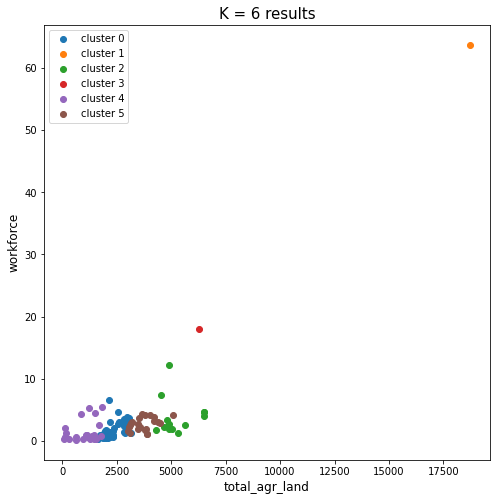

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df_fin.loc[df_fin['cluster'] == i, 'total_agr_land'], df_fin.loc[df_fin['cluster'] == i, 'workforce'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('total_agr_land', size = 12)
plt.ylabel('workforce', size = 12)
plt.show()

In [ ]:
df_fin.groupby('cluster')['cons_general'].mean()

cluster
0    3.976744
1    4.000000
2    3.785714
3    4.000000
4    3.916667
5    4.090909
Name: cons_general, dtype: float64

In [ ]:
# outlier
print(len(df_clean))
df_clean = df_clean.drop([92])
df_fin = df_fin.drop([92])
print(len(df_clean))

105
104


In [ ]:
k = 7

model = KMeans(n_clusters = k, random_state = 10)
model.fit(df_clean)
df_fin['cluster'] = model.fit_predict(df_clean)

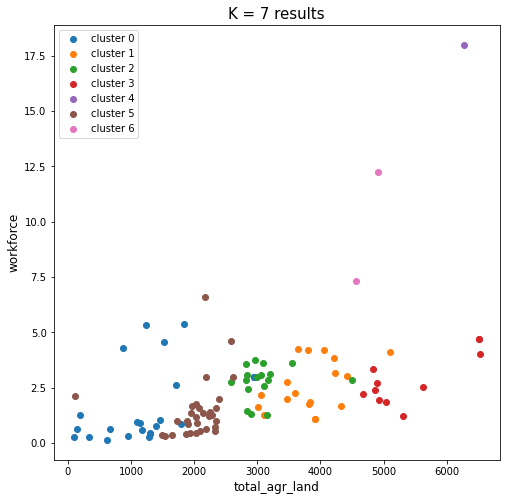

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df_fin.loc[df_fin['cluster'] == i, 'total_agr_land'], df_fin.loc[df_fin['cluster'] == i, 'workforce'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('total_agr_land', size = 12)
plt.ylabel('workforce', size = 12)
plt.show()

In [ ]:
# Is there any specific cluster of farmers who care more about climate change? 

In [ ]:
df_fin.groupby('cluster')['cons_general'].mean()

cluster
0    3.916667
1    3.888889
2    4.352941
3    3.909091
4    4.000000
5    3.903226
6    3.000000
Name: cons_general, dtype: float64

### Conclusion

The farmers in cluster 2 think the climate change will have very negative consequences for agriculture in Switzerland.

On the other hand, the farmers in cluster 6 think the climate change will have no consequences.

No cluster think the climate change will have positive consequences.
